<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Save the data file from link on website given above
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
!ls

--2019-09-16 01:05:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-09-16 01:05:42 (174 MB/s) - ‘haberman.data’ saved [3103/3103]

haberman.data  sample_data


In [0]:
# Save the codebook file from link on website given above
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names'

--2019-09-16 01:06:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1368 (1.3K) [application/x-httpd-php]
Saving to: ‘haberman.names’

haberman.names      100%[===================>]   1.34K  --.-KB/s    in 0s      

2019-09-16 01:06:18 (201 MB/s) - ‘haberman.names’ saved [1368/1368]



In [0]:
# Load dataset into a Pandas DataFrame
import pandas as pd
df_ca = pd.read_csv('haberman.data')

In [0]:
# Check the head to see what we have
df_ca.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
# Not seeing any headers in the file so will fix that here
df_ca = pd.read_csv('haberman.data', header=None)

In [0]:
# Check the head which looks better now
df_ca.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# Check observations and features to see if match, which they do. We have 306 observations and 3 features and the other column will be the target variable
df_ca.shape

(306, 4)

In [0]:
# Make a quick check of the observation counts
df_ca.count()

0    306
1    306
2    306
3    306
dtype: int64

In [0]:
# Lets check for missing values, which based on the result, there are none
df_ca.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
# Let's add some names to the features that make sense
df_ca.columns = ['Age', 'Operation Year', 'Positive Axillary Nodes Detected', 'Survival Status']
df_ca.head()

,Age,Operation Year,Positive Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# Change the code for not surviving from 2 to 0
df_ca['Survival Status'] = df_ca['Survival Status'].replace(2, 0)
df_ca.head(40)

,Age,Operation Year,Positive Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [0]:
# Print the first five rows of the dataset to demonstrate the above is done as asked
df_ca.head()

,Age,Operation Year,Positive Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Explore the data
# Summary stats for numerical columns
df_ca.describe()

,Age,Operation Year,Positive Axillary Nodes Detected,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# Let's do a crosstab with Survival Status as a function of Positive Axillary Nodes Detected
pd.crosstab(df_ca['Survival Status'],df_ca['Positive Axillary Nodes Detected'], normalize=True)

Positive Axillary Nodes Detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Survival Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.062092,0.026144,0.01634,0.022876,0.009804,0.013072,0.009804,0.006536,0.006536,0.013072,0.003268,0.009804,0.003268,0.013072,0.003268,0.006536,0.000000,0.003268,0.000000,0.006536,0.003268,0.003268,0.003268,0.009804,0.003268,0.000000,0.000000,0.000000,0.003268,0.000000,0.003268
1,0.382353,0.107843,0.04902,0.042484,0.032680,0.006536,0.013072,0.016340,0.016340,0.006536,0.006536,0.003268,0.003268,0.003268,0.009804,0.003268,0.003268,0.000000,0.003268,0.003268,0.003268,0.000000,0.006536,0.000000,0.000000,0.003268,0.003268,0.003268,0.000000,0.003268,0.000000


In [0]:
# Cut PAND into bins since above too long
pand_bins = pd.cut(df_ca['Positive Axillary Nodes Detected'], 5)
pand = pd.crosstab(df_ca['Survival Status'], pand_bins, normalize=True)
pand

Positive Axillary Nodes Detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Survival Status,,,,,
0,0.189542,0.049020,0.019608,0.003268,0.003268
1,0.679739,0.035948,0.016340,0.000000,0.003268


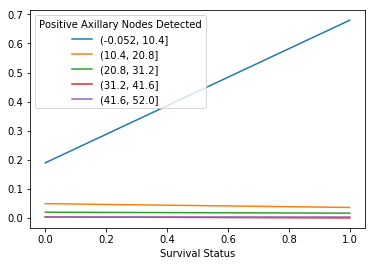

In [0]:
pand.plot()

Text(0, 0.5, 'Survival Status')

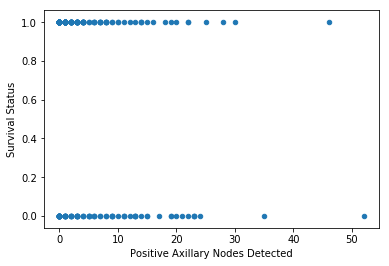

In [0]:
# Scatter plot of Survival as a function of Positive Axillary Nodes Detected
df_ca.plot.scatter('Positive Axillary Nodes Detected', 'Survival Status')
plt.xlabel('Positive Axillary Nodes Detected')
plt.ylabel('Survival Status')

In [0]:
# Let's do a crosstab with Survival Status as a function of Age
pd.crosstab(df_ca['Survival Status'],df_ca['Age'] )

Age,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83
Survival Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,0,0,1,1,0,3,2,4,3,3,4,3,3,2,2,2,4,6,4,2,2,3,0,1,2,3,3,1,0,4,2,2,0,1,2,0,1,0,1,0,0,0,1,1
1,3,2,2,5,2,2,6,9,5,3,7,7,7,4,6,3,8,4,8,10,4,10,5,9,8,5,8,7,7,4,6,4,7,5,6,3,4,2,3,5,1,3,2,1,1,1,1,0,0


In [0]:
# Put Age into bins
time_bins = pd.cut(df_ca['Age'], 5)
ca = pd.crosstab(df_ca['Survival Status'], time_bins, normalize=True)
ca

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survival Status,,,,,
0,0.013072,0.101307,0.088235,0.052288,0.009804
1,0.127451,0.222222,0.225490,0.140523,0.019608


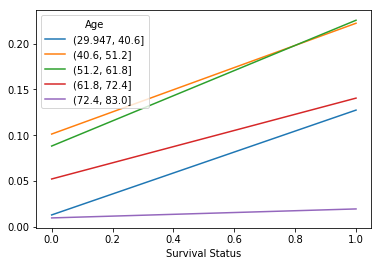

In [0]:
ca.plot()

Text(0, 0.5, 'Survival Status')

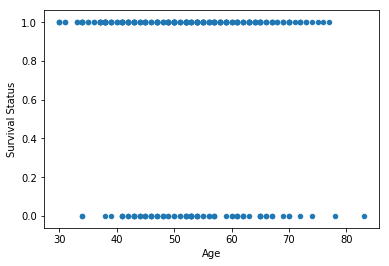

In [0]:
# Scatter plot of Survival as a function of Age
df_ca.plot.scatter('Age', 'Survival Status')
plt.xlabel('Age')
plt.ylabel('Survival Status')

In [0]:
# Let's do a crosstab with Survival Status as a function of Operation year
ssop = pd.crosstab(df_ca['Survival Status'], df_ca['Operation Year'], normalize=True)
ssop

Operation Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival Status,,,,,,,,,,,,
0,0.039216,0.029412,0.013072,0.009804,0.022876,0.026144,0.026144,0.042484,0.019608,0.013072,0.009804,0.013072
1,0.078431,0.058824,0.078431,0.075163,0.052288,0.071895,0.075163,0.049020,0.071895,0.068627,0.032680,0.022876


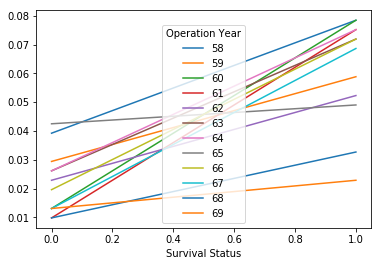

In [0]:
ssop.plot()

Text(0, 0.5, 'Survival Status')

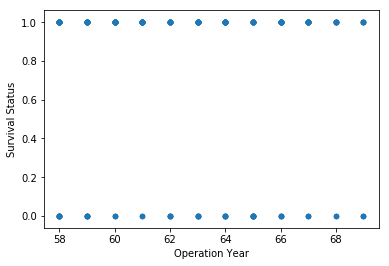

In [0]:
# Scatter plot of Survival as a function of Positive Axillary Nodes Detected
df_ca.plot.scatter('Operation Year', 'Survival Status')
plt.xlabel('Operation Year')
plt.ylabel('Survival Status')

In [0]:
# Put Age into bins
time_bins = pd.cut(df_ca['Age'], 5)
op = pd.crosstab(df_ca['Operation Year'], time_bins, normalize=True)
op

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Operation Year,,,,,
58,0.019608,0.032680,0.026144,0.035948,0.003268
59,0.016340,0.035948,0.026144,0.009804,0.000000
60,0.029412,0.019608,0.035948,0.006536,0.000000
61,0.003268,0.032680,0.026144,0.022876,0.000000
62,0.006536,0.022876,0.029412,0.009804,0.006536
63,0.016340,0.039216,0.022876,0.016340,0.003268
64,0.009804,0.042484,0.035948,0.013072,0.000000
65,0.009804,0.029412,0.029412,0.013072,0.009804
66,0.013072,0.026144,0.022876,0.029412,0.000000


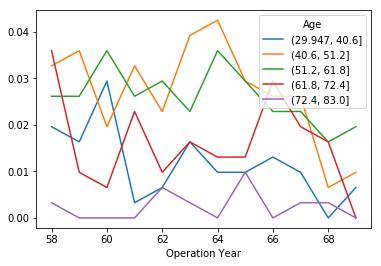

In [0]:
op.plot()

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
mask = df_ca['Survival Status'] == 0
survived = df_ca[mask]
did_not_survive = df_ca[~mask]

In [0]:
survived.head()

,Age,Operation Year,Positive Axillary Nodes Detected,Survival Status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


In [0]:
survived.shape

(81, 4)

In [0]:
did_not_survive.shape

(225, 4)

In [0]:
df_ca.shape

(306, 4)

<Figure size 1080x720 with 0 Axes>

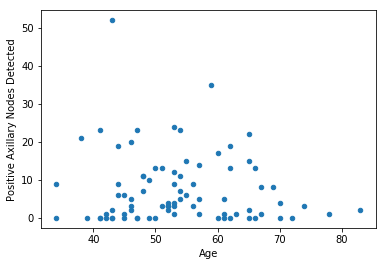

In [0]:
survived.plot.scatter('Age', 'Positive Axillary Nodes Detected')

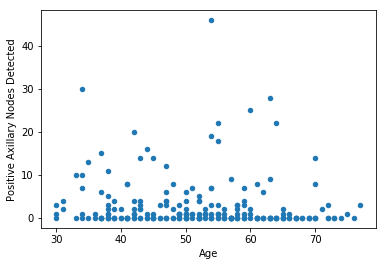

In [0]:
did_not_survive.plot.scatter('Age', 'Positive Axillary Nodes Detected')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Q1. What is at least one feature that looks to have a positive relationship with survival (As that feature goes up in value, rate of survival increases).

A1. It looks like age had a positive relationship with survival until around the age of 61

Q2. What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value, the rate of survival increases)

A2. One feature that looks to have a negative relationship with survival was Positive Axillary Nodes Detected. As that went up, survival went down. 

Q3. How are those two features related with each other, and what might that mean.

A3. It seems the more tumors someone had, the less chance of survival. At first I thought maybe the more they could detect, the more they could cure but we dont know when those detections are coming. Are they detecting them late? Or are they detecting them ealry, which would have an effect on this relationship. And it would make sense that if someone had too many, there would be less chance of survival as well. But timing of the detection would be an important parameter here.

In [0]:
# Any Supplemental Code for Analysis Here